# Semana 3 do Aceleradev DS Codenation

## Professor: Túlio Vieira de Souza | Tema: Amostragens e Distribuições de Probabilidades

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as act
import seaborn as sns

Para entender de distribuições, vamos começar fazendo um gráfico de **Distribuição Normal** *$N(\mu,\sigma)$*
```python
scipy.stats.norm.rvs(loc=int, scale=int, size=int)
```

**Parâmetros:**

- size: tamanho da amostra. São gerados *int* valores aleatórios
- scale: desvio padrão
- loc: média

In [11]:
normal = act.norm.rvs(loc=10, scale=3, size=1000)

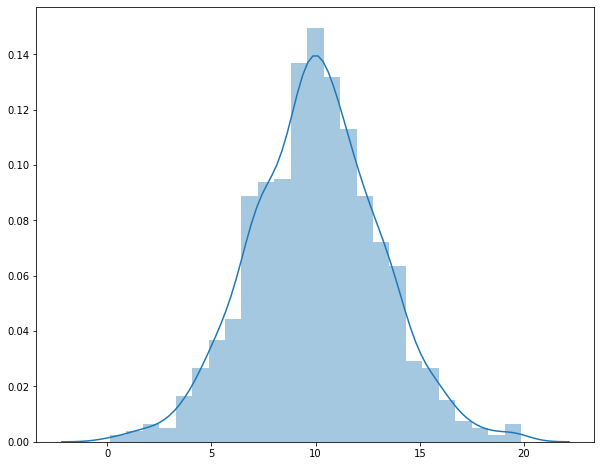

In [12]:
plt.figure(figsize=(10,8))
sns.distplot(normal);

Como são valores aleatórios, as estatísticas do conjunto sempre serão ligeiramente diferentes do *loc* e *scale*

In [17]:
normal.mean(), normal.var(), normal.std()

(10.018243558425244, 9.38312011146795, 3.063187900124305)

Podemos calcular a probabilidade de ocorrer um valor menor igual a *float* $P(X \leq float)$ com a *CDF*
```python
scipy.stats.cdf(x=float ou list, loc=int, scale=int)
```

Com a *CDF*, também podemos calcular a probabilidade do evento **complementar** $P(X > float)$ subtraindo 1 da função acima, ou
```python
scipy.stats.sf(x=float ou list, loc=int, scale=int)
```

Se quisermos obter o valor da **função densidade de probabilidade** *p(X = x)*
```python
scipy.stats.pdf(x=float ou list, loc=int, scale=int)
```

**Parâmetros:**

- x: se int, (-$\infty$, int]. Se list, array([prob1, prob2])
- loc: média
- scale: desvio padrão

Para calcular P(X $\leq$ 8) com a *CDF*

In [37]:
act.norm.cdf(x=8, loc=10, scale=3)

0.2524925375469229

Para calcular o evento complementar de P(X $\leq$ 8), P(X $>$ 8)

In [51]:
1 - act.norm.cdf(x=8, loc=10, scale=3)

0.7475074624530771

In [53]:
act.norm.sf(x=8, loc=10, scale=3)

0.7475074624530771

Para calcular P(4 $\leq$ X $\leq$ 5) com a *CDF*

In [38]:
intervalo = act.norm.cdf(x=[4, 5], loc=10, scale=3)
intervalo[1] - intervalo[0]

0.025040220324635508

**Perceba:** Como previsto, se fizermos P(X $\leq \mu$), teremos 50% de chance de X assumir um valor menor ou igual a média, uma vez que a N($\mu, \sigma$) é simétrica em torno da média.

In [30]:
act.norm.cdf(x=10, loc=10, scale=3)

0.5

Podemos fazer o gráfico da função *CDF* e percebermos que, de fato, ela é *cumulativa*

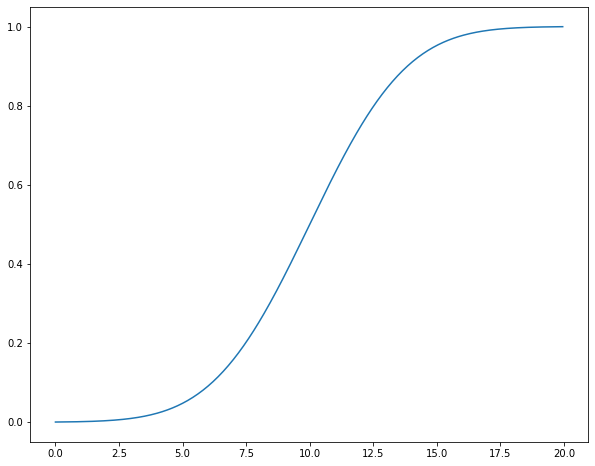

In [81]:
malha = np.arange(0, 20, .05)
cumulativa = act.norm.cdf(malha, loc=10, scale=3)

plt.figure(figsize=(10, 8))
plt.plot(malha, cumulativa)
plt.show()

Pela *CDF*, pudemos obter a **probabilidade acumulada** dada uma v.a X. Agora, e se quisermos obter o x de *PDF* que gera a probabilidade acumulada? Por exemplo, vimos que P(X $\leq$ 8) = 0.2524925375469229, como descobrir o "x" de P(X $\leq$ x) = 0.2524925375469229?
```python
scipy.norm.ppf(x=float, loc=float, scale=float)
```

como *PDF* é simétrica em relação à $\mu$, existem 2 valores de x para *PDF*, sendo essa função acima a que trabalha com o **lado esquerdo** da distribuição de probabilidade. Para o lado esquerdo
```python
scipy.norm.isf(x=float, loc=float, scale=float)
```

Novamete, P(X $\leq$ 8)

In [70]:
act.norm.cdf(x=8, loc=10, scale=3)

0.2524925375469229

P(X $\leq$ x) = 0.2524925375469229 para o lado *esquerdo*

In [72]:
act.norm.ppf(q=0.2524925375469229, loc=10, scale=3)

8.0

P(X $\geq$ x) = 0.2524925375469229 para o lado *direito*

In [73]:
act.norm.isf(q=0.2524925375469229, loc=10, scale=3)

12.0

Podemos encontar o valor da *PDF* p(x=8) ou p(x=12). E como esperado, devem resultar o mesmo valor, pois são simétricos à $\mu$

In [74]:
act.norm.pdf(x=[8, 12], loc=10, scale=3)

array([0.10648267, 0.10648267])

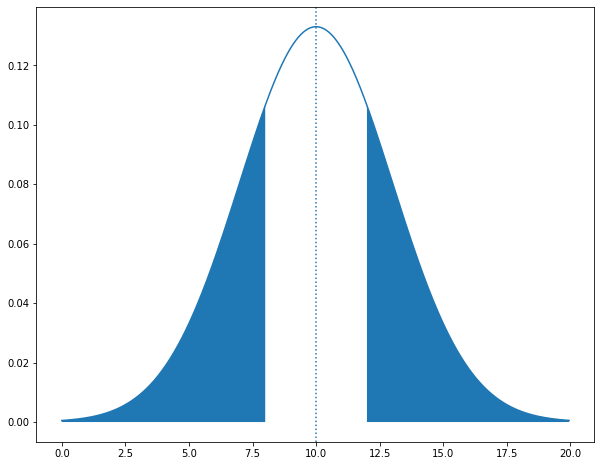

In [134]:
p = act.norm.pdf(malha, scale=3, loc=10)
plt.figure(figsize=(10, 8))
plt.plot(malha, p)
plt.axvline(x=10, ls=':')
plt.fill_between(malha, 0, p, where= p<=0.10648267)
plt.show()